downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


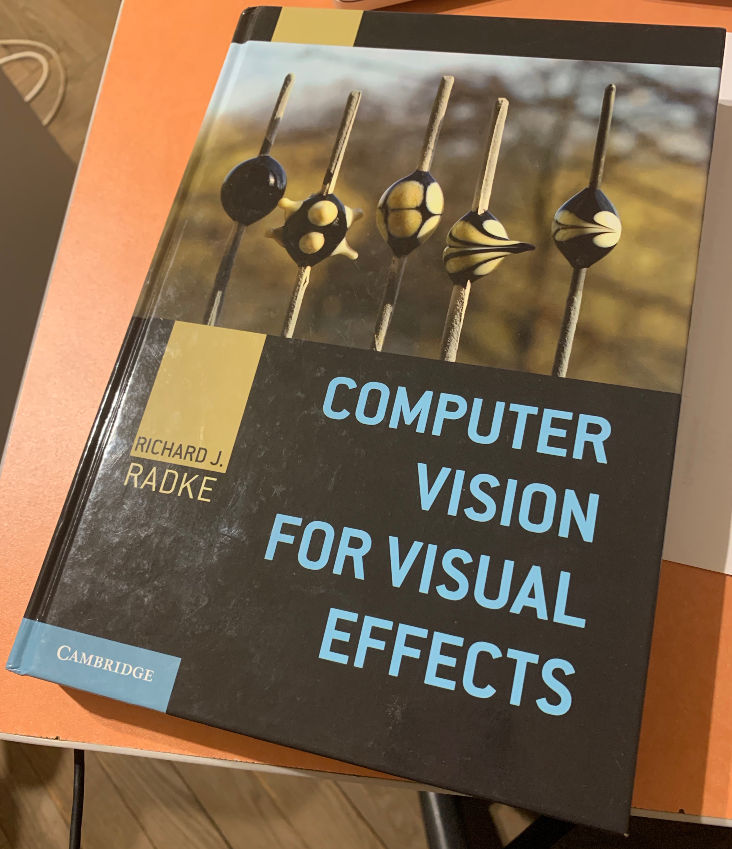

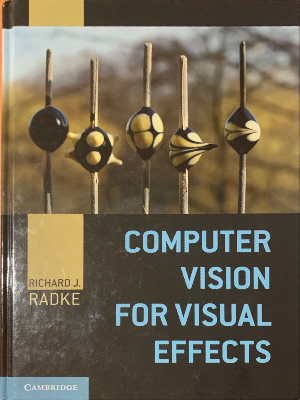

In [2]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
cv2_imshow(img)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])


# implement this function
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.cv2.warpPerspective(img,M,(300, 400))
cv2_imshow(dst)



[[ 6.99643739e-01  2.48362959e-01 -1.70104319e+02]
 [-3.70694870e-02  7.81682661e-01  4.24365041e+00]
 [ 2.82201232e-04  5.76707579e-04  9.28529258e-01]]


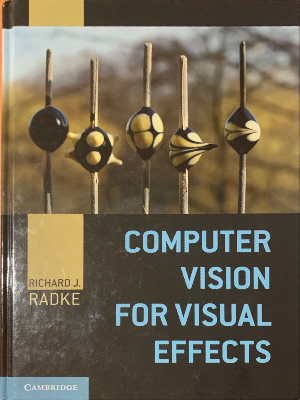

In [3]:
def projective(pts1, pts2):
  H = np.zeros((13, 13))
  
  H[0] = np.concatenate((np.array(pts1[0]), np.array([1, 0, 0, 0, 0, 0, 0]), np.array([-pts2[0][0]]), np.zeros(3)))
  H[1] = np.concatenate((np.zeros(3), np.array(pts1[0]), np.array([1, 0, 0, 0]), [-pts2[0][1]], np.zeros(3)))
  H[2] = np.concatenate((np.zeros(6), np.array(pts1[0]), np.array([1, -1, 0, 0, 0])))
  
  H[3] = np.concatenate((np.array(pts1[1]), np.array([1, 0, 0, 0, 0, 0, 0]), [0], [-pts2[1][0]], np.zeros(2)))
  H[4] = np.concatenate((np.zeros(3), np.array(pts1[1]), np.array([1, 0, 0, 0]), [0], [-pts2[1][1]], np.zeros(2)))
  H[5] = np.concatenate((np.zeros(6), np.array(pts1[1]), np.array([1, 0, -1, 0, 0])))
  
  H[6] = np.concatenate((np.array(pts1[2]), np.array([1, 0, 0, 0, 0, 0, 0]), [0, 0],[-pts2[2][0]], np.zeros(1)))
  H[7] = np.concatenate((np.zeros(3), np.array(pts1[2]), np.array([1, 0, 0, 0]), [0, 0], [-pts2[2][1]], np.zeros(1)))
  H[8] = np.concatenate((np.zeros(6), np.array(pts1[2]), np.array([1, 0, 0, -1, 0])))
  
  H[9] = np.concatenate((np.array(pts1[3]), np.array([1, 0, 0, 0, 0, 0, 0]), [0, 0, 0], [-pts2[3][0]]))
  H[10] = np.concatenate((np.zeros(3), np.array(pts1[3]), np.array([1, 0, 0, 0]), [0, 0, 0], [-pts2[3][1]]))
  H[11] = np.concatenate((np.zeros(6), np.array(pts1[3]), np.array([1, 0, 0, 0, -1])))
  
  H[12] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
  
  b = np.concatenate((np.zeros(12), [1]))
  
  x = np.linalg.inv(H) @ b
  
  res = x[0:9].reshape((3,3)) #/ x[8]
  print(res)
  
#   print(H)
  
  return res
  
H = projective(pts1, pts2)

dst = cv2.cv2.warpPerspective(img,H,(300, 400))
cv2_imshow(dst)